In [2]:
import os
import pandas as pd
import json

# Spécifiez le répertoire où les fichiers JSON sont stockés
local_dir = "./meteo_data/"

# Liste tous les fichiers JSON dans le répertoire local
json_files = [os.path.join(local_dir, f) for f in os.listdir(local_dir) if f.endswith('.json')]

# Lire et fusionner les fichiers JSON
dataframes = []

for file in json_files:
    with open(file, 'r') as f:
        try:
            data = json.load(f)
            # Vérifier si le contenu est un objet ou une liste
            if isinstance(data, dict) or isinstance(data, list):
                df = pd.json_normalize(data) if isinstance(data, dict) else pd.DataFrame(data)
                dataframes.append(df)
            else:
                print(f"Le fichier {file} ne contient pas des données JSON valides.")
        except Exception as e:
            print(f"Erreur en lisant {file}: {e}")

# Fusionner les DataFrames
df_merged = pd.concat(dataframes, ignore_index=True)

# Afficher les premières lignes du DataFrame fusionné
print(df_merged.head())


               datetime  temperature
0  2025-03-03T09:54:22Z          6.5
1  2025-03-03T10:09:07Z          6.8
2  2025-03-03T09:58:17Z          6.6
3  2025-03-03T10:02:26Z          6.7
4  2025-03-03T09:49:33Z          6.4


In [ ]:
df_merged.rename(columns={'datetime': 'date'}, inplace=True)

In [9]:
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['date'] = df_merged['date'].dt.strftime('%d-%m-%Y %H:%M:%S')

In [ ]:
df_merged

,date,temperature
0,03-03-2025 09:54:22,6.5
1,03-03-2025 10:09:07,6.8
2,03-03-2025 09:58:17,6.6
3,03-03-2025 10:02:26,6.7
4,03-03-2025 09:49:33,6.4
...,...,...
119,03-03-2025 09:51:57,6.5
120,03-03-2025 10:07:35,6.8
121,03-03-2025 09:51:37,6.5
122,03-03-2025 10:00:00,6.7


In [16]:
df_merged.sort_values(by='date', inplace=True)

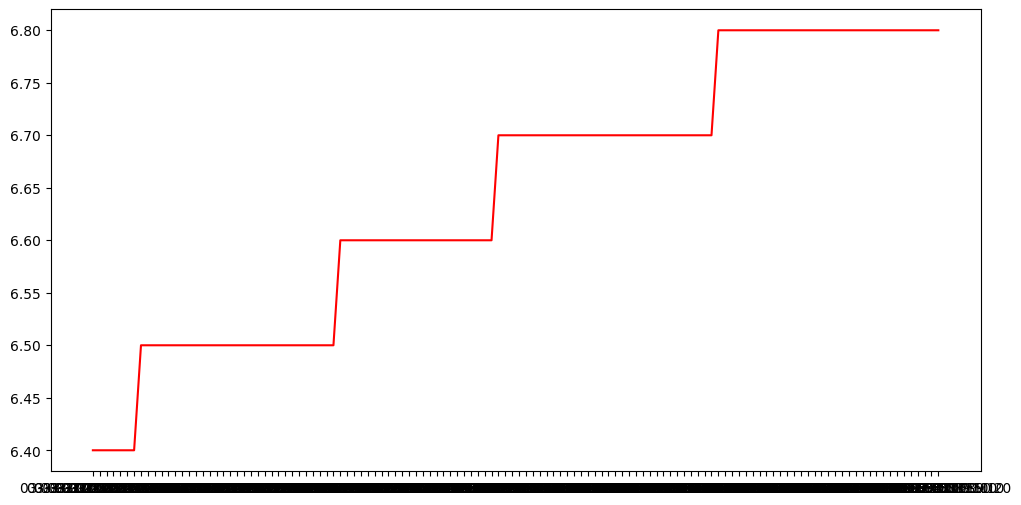

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_merged['date'], df_merged['temperature'], label='Temperature (°C)', color='r')
plt.show()